In [2]:
import os
import random
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

In [3]:
def gen_data():
    training_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    validation_datagen = ImageDataGenerator(
        rescale=1/255
    )
    
    training_generator = training_datagen.flow_from_directory(
        'cat-dog-dataset/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )
    
    validation_generator = validation_datagen.flow_from_directory(
        'cat-dog-dataset/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )
    
    return training_generator, validation_generator

In [4]:
callback_1 = ModelCheckpoint(
    'cat_dog_model_checkpoint/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5', # Tên model tại mỗi điểm checkpoint
    monitor='val_acc', # Giá trị cần theo dõi
    save_best_only=True, # Chỉ lưu những model tốt nhất đến thời điểm checkpoint
    save_weights_only=True, # Chỉ lưu weights của model (để giảm kích thước)
    save_freq='epoch', # Checkpoint sau mỗi epoch
    mode='auto', # Val_acc phải tăng mới tính là model được cải thiện. Nếu monitor='loss/val_loss' thì nó phải giảm mới tính là model được cải thiện
    verbose=1 # Hiển thị thông tin model lúc checkpoint
)

In [5]:
callback_2 = EarlyStopping(monitor='val_acc', patience=5)

In [6]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
    
    return model

In [7]:
def plot_chart(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, loss, 'g', label='Training Loss')
    plt.plot(epochs, val_loss, 'y', label='Validation Loss')

    plt.title('Traing and Validation, Accuracy and Loss')
    plt.legend(loc=0)
    plt.show()

In [8]:
training_generator, validation_generator = gen_data()
model = create_model()

history = model.fit(
    training_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[callback_1, callback_2],
    verbose=1
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/30
625/625 [==============================] - ETA: 0s - loss: 0.6804 - acc: 0.5882
Epoch 00001: val_acc improved from -inf to 0.69340, saving model to horse-humand_model_checkpoint/weights-improvement-01-0.69.hdf5
625/625 [==============================] - 115s 184ms/step - loss: 0.6804 - acc: 0.5882 - val_loss: 0.6017 - val_acc: 0.6934
Epoch 2/30
625/625 [==============================] - ETA: 0s - loss: 0.6239 - acc: 0.6591
Epoch 00002: val_acc improved from 0.69340 to 0.73060, saving model to horse-humand_model_checkpoint/weights-improvement-02-0.73.hdf5
625/625 [==============================] - 112s 179ms/step - loss: 0.6239 - acc: 0.6591 - val_loss: 0.5446 - val_acc: 0.7306
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 0.5922 - acc: 0.6922
Epoch 00003: val_acc improved from 0.73060 to 0.76340, saving model to horse-humand_model_checkpoint/weights-improvement-03-0.7

In [9]:
def plot_chart(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, loss, 'g', label='Training Loss')
    plt.plot(epochs, val_loss, 'y', label='Validation Loss')

    plt.title('Traing and Validation, Accuracy and Loss')
    plt.legend(loc=0)
    plt.show()

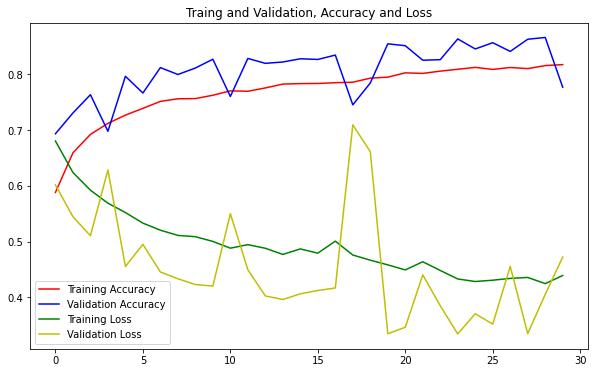

In [10]:
plot_chart(history)